<a href="https://colab.research.google.com/github/seecode4/seeRepo1/blob/main/mec2-projects/Student_MLE_MiniProject_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [1]:
!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal, RandomUniform
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [3]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Download the dataset and load it into a pandas DataFrame
df_data = pd.read_csv(DATA_PATH, header=None)

In [4]:
# Display the first few rows of the DataFrame
print(df_data.head())
print(df_data.shape)

   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [5]:
# Ref: https://archive.ics.uci.edu/dataset/2/adult
feat_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
             'marital-status', 'occupation', 'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
             'income']
# Combine both
# help(df_data.set_axis)
df_raw = df_data.set_axis(feat_names, axis='columns')
print(df_raw.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [6]:
# Do some exploratory analysis. How many rows/columns are there? How are NULL
# values represented? What's the percentrage of positive cases in the dataset?
num_rows = df_raw.shape[0]
num_cols = df_raw.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Column, i.e, feature names:\n", df_raw.columns[0:-1])
print("Target:", df_raw.columns[-1], "\n")
print("Column Data Types:\n", df_raw.dtypes)
print("\nNumber of isnull:\n", df_raw.isnull().sum())
print("Number of isna:\n", df_raw.isna().sum())
print("\nValue Counts for each feature:")
for featname in df_raw.columns:
  print(f"\n-----{featname}-----\n {df_raw[featname].value_counts()}")
target_value_counts = list(df_raw['income'].value_counts())
income_le_50k_pcnt = 100 * target_value_counts[0]/num_rows
income_gt_50k_pcnt = 100 * target_value_counts[1]/num_rows
print(f"\nPercentage of people with income <= 50K: {income_le_50k_pcnt:0.2f}%")
print(f"Percentage of people with income > 50K: {income_gt_50k_pcnt:0.2f}%")

Number of rows: 32561
Number of columns: 15
Column, i.e, feature names:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Target: income 

Column Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Number of isnull:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-

In [7]:
# Find all NULL values and drop them
# Check if value_counts match for this check
df = df_raw
print("Unknown Occupation Before drop null:", (df.loc[:,"occupation"].str.strip() == '?').sum())
for featname in df.columns:
  # string columns are of type 'object'
  if (df[featname].dtype == 'object'):
    # drop all rows that contain '?' which is the same as NULL here
    df = df.drop(df[df[featname].str.strip() == '?'].index)
print("Unknown Occupation After drop null:", (df.loc[:,"occupation"].str.strip() == '?').sum())

print("df shape after drop null:", df.shape)

Unknown Occupation Before drop null: 1843
Unknown Occupation After drop null: 0
df shape after drop null: (30162, 15)


In [8]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
print(df['income'].value_counts())

income
0    22654
1     7508
Name: count, dtype: int64


1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [9]:
# Split dataset into training and test sets
# Lst[ Initial : End : IndexJump ]
print(df.columns)
X = df.iloc[:, 0:-1]
y = df.loc[:, 'income']
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
(30162, 14)
(30162,)
(24129, 14)
(6033, 14)


In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

In [10]:
# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that
# always predicts the majority class.
income_cnts = df['income'].value_counts()
for k,v in income_cnts.items():
  if v == max(income_cnts):
    pred_majority_class = k
print(pred_majority_class)
y_test_pred = np.full(shape=y_test.shape, fill_value=pred_majority_class)
# print(y_test.shape, y_test_pred.shape)
score = roc_auc_score(y_test, y_test_pred)
print("roc_auc_score with majority class always:", score)

0
roc_auc_score with majority class always: 0.5


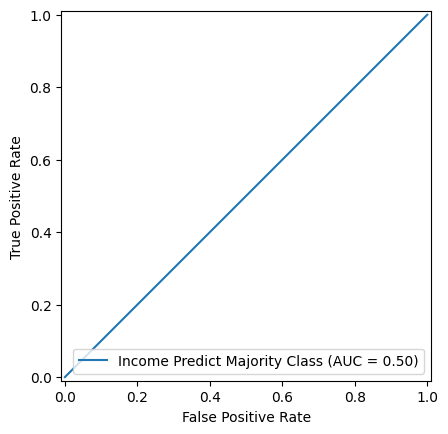

In [11]:
# Generate an ROC curve for model that always predicts majority class
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
roc_plt = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Income Predict Majority Class')
roc_plt.plot()

roc_auc_score with random class: 0.5


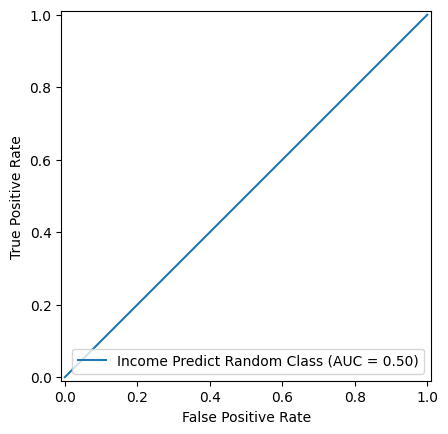

In [12]:
# always predicts a random class.
from random import randint
y_test_pred = np.full(shape=y_test.shape, fill_value=randint(0, 1))
# print(y_test.shape, y_test_pred.shape)
score = roc_auc_score(y_test, y_test_pred)
print("roc_auc_score with random class:", score)

# Generate an ROC curve for this
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
roc_plt = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Income Predict Random Class')
roc_plt.plot()

Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [13]:
import tensorflow as tf

note=""" In tensorflow, a random operation relies on two different seeds:
a global seed, set by tf.set_random_seed, and
an operation seed, provided as an argument to the operation.
"""
# Config to make results repeatable/deterministic
tf.config.experimental.enable_op_determinism()
np.random.seed(1)
SEED=43
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

In [14]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the
# categorical variables in workclass, education, marital-status, occupation,
# relationship, 'race', sex, and native-country. #Also, apply MinMaxScaler to
# the remaining continuous features.
note = """
Each transformer is a three-element tuple that defines the name of the transformer,
 the transform to apply, and the column indices to apply it to.
For example:
(Name, Object, Columns)
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [0, 1])])
"""
dts = X.dtypes

def get_col_indexes(df, col_names):
  return [df.columns.get_loc(name) for name in col_names]

# Categorical features and corresponding column index
cat_columns = [k for k,v in dts.items() if (v == 'object')]
cat_ix = get_col_indexes(X, cat_columns)

# Continuous features and corresponding column index
cont_columns = [k for k,v in dts.items() if (v != 'object')]
cont_ix = get_col_indexes(X, cont_columns)
print("cat_ix:", cat_ix, " cont_ix:", cont_ix)

# data preparation for categorical and continuous features
t = [('cat', OneHotEncoder(handle_unknown='ignore'), cat_ix),
     ('cont', MinMaxScaler(), cont_ix)]
ct = ColumnTransformer(transformers=t)

# preproc = Pipeline(steps=[('prep', col_transform)])
# fit transform on X
X_trans = ct.fit_transform(X)

cat_ix: [1, 3, 5, 6, 7, 8, 9, 13]  cont_ix: [0, 2, 4, 10, 11, 12]


In [15]:
# How many columns will the dataframe have after these columns transformations are applied?
print(X_trans.shape, type(X_trans))

ct_feat_names = ct.get_feature_names_out()
print("Number of columns after transformation:", ct_feat_names.shape[0])

(30162, 104) <class 'scipy.sparse._csr.csr_matrix'>
Number of columns after transformation: 104


Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [16]:
%%time
# Simple keras "Sequential" model with 1 hidden layer
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=1)
print(X_train.shape, y_train.shape)

num_feat = X_train.shape[1]
print("Num features in input for model:", type(num_feat), num_feat)

# Define the Keras model
basic_model = Sequential()

# One hidden layer with 8 neurons
initializer = RandomNormal(mean=0.0, stddev=1.0, seed=SEED)
# initializer = RandomUniform()
basic_model.add(Dense(8, input_shape = (num_feat,), activation="relu",
                      kernel_initializer=initializer,
                      use_bias=False))

# Output layer with 1 neurons (2 income classes)
basic_model.add(Dense(1, activation="sigmoid", kernel_initializer=initializer))

# Summarise the model
basic_model.summary()

# Compile the model
basic_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit to data
act_result = basic_model.fit(X_train, y_train, epochs=1)

(22621, 104) (22621,)
Num features in input for model: <class 'int'> 104


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841 (3.29 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

707/707 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7474 - loss: 0.5952
CPU times: user 6.64 s, sys: 178 ms, total: 6.82 s
Wall time: 11.1 s


In [17]:
# help(Dense)

In [18]:
%%time
# Test if the model is well assembled by predicting before training
y_pred = basic_model.predict(X_train)
make_bin = lambda val: 0 if val > 0.5 else 1
y_pred_df = pd.DataFrame(np.array([make_bin(yi) for yi in y_pred]))
print(type(y_pred_df), y_pred_df.shape, "\n", y_pred_df.value_counts(), y_train.value_counts())

# Test, Loss and accuracy
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

y_test_pred = basic_model.predict(X_test)
basic_score = roc_auc_score(y_test, y_test_pred)
print(f"\nroc_auc_score with basic_model: {basic_score:0.3f}")

707/707 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step
<class 'pandas.core.frame.DataFrame'> (22621, 1) 
 1    20404
0     2217
Name: count, dtype: int64 income
0    17012
1     5609
Name: count, dtype: int64
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7679 - loss: 0.4714
Loss =  0.46481853723526
Accuracy =  0.7757591605186462
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

roc_auc_score with basic_model: 0.788
CPU times: user 8.38 s, sys: 230 ms, total: 8.61 s
Wall time: 14.7 s


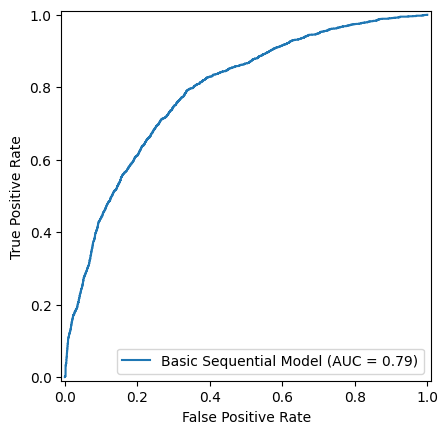

In [19]:
# Generate an ROC curve for basic (Sequential) keras model
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
roc_plt = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Basic Sequential Model')
roc_plt.plot()

In [20]:
%%time
# From previous steps
# ct = ColumnTransformer(transformers=t)
# TBD - how to pass num_feat after ColumTransormer to KerasClassifier
num_pipe_feat = 104

# Split Data (before ColumnTransformer) into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4, shuffle=True)

# num_pipe_feat = X.shape[1]
print("Num features in pipeline input for model:", type(num_pipe_feat), num_pipe_feat)

# Function to create model, required for KerasClassifier
def create_model(input_dim):
  """With input_dim given create keras Sequential model with 3 hidden layers of 8, 16 and 8 neurons"""
  # create model
  # initializer = RandomNormal(mean=0.0, stddev=1.0, seed=SEED)
  initializer = RandomUniform(minval=0.0, maxval=1.0, seed=SEED)
  model = Sequential()
  model.add(Dense(8, input_dim=input_dim, activation='relu', kernel_initializer=initializer))
  model.add(Dense(16, activation='leaky_relu', kernel_initializer=initializer,))
  model.add(Dense(4, activation='relu', kernel_initializer=initializer,))
  model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer,))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Num features in pipeline input for model: <class 'int'> 104
CPU times: user 19.7 ms, sys: 0 ns, total: 19.7 ms
Wall time: 20 ms


In [21]:
%%time
# Create KerasClassifier
kerasclf_model = KerasClassifier(model=create_model, epochs=16, batch_size=24, verbose=1, input_dim=num_pipe_feat)

# Create the scikit-learn pipeline
p_ct_kclf = Pipeline(steps=[
    ('prep', ct),
    ('clf', kerasclf_model)
])

CPU times: user 196 µs, sys: 0 ns, total: 196 µs
Wall time: 2.39 ms


In [22]:
%%time
# Fit the pipeline on the training data
history = p_ct_kclf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2470 - loss: 85.0022
Epoch 2/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6971 - loss: 0.6355
Epoch 3/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7533 - loss: 0.5613
Epoch 4/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7542 - loss: 0.5411
Epoch 5/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7794 - loss: 0.4828
Epoch 6/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8237 - loss: 0.4108
Epoch 7/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8371 - loss: 0.3676
Epoch 8/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8422 - loss: 0.3479
Epoch 9/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8448 - loss: 0.3384
Epoch 10/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8461 - loss: 0.3325
Epoch 11/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8486 - loss: 0.3282
Epoch 12/16
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/ste

In [23]:
# Calculate the AUC score of your model on the test data.
# Does the model predict better than random?
y_test_pipe_pred = p_ct_kclf.predict(X_test)
p_ct_kclf_score = roc_auc_score(y_test, y_test_pipe_pred)
print(f"roc_auc_score with KerasClassifier pipeline: {p_ct_kclf_score:0.3f}")
print("This score is better than the 0.5 score with a random classifier")

315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
roc_auc_score with KerasClassifier pipeline: 0.782
This score is better than the 0.5 score with a random classifier


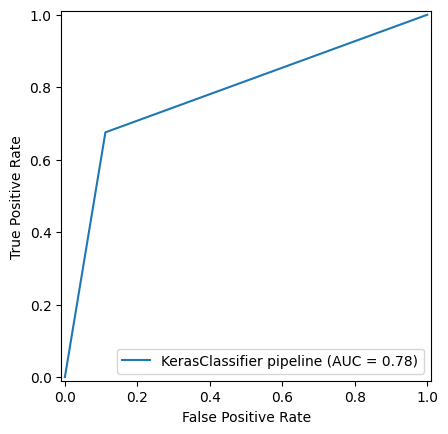

In [24]:
# Generate an ROC curve for your model.

fpr, tpr, thresholds = roc_curve(y_test, y_test_pipe_pred)
roc_auc = auc(fpr, tpr)
roc_plt = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='KerasClassifier pipeline')
roc_plt.plot()

Summary:

For this project, started with the [Adult Income data set](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) provided.

From the raw data and the documentation for this dataset, see the following:</br>
>Number of rows: 32561</br>
Number of columns: 15</br>
Feature names: ['age', 'workclass', 'fnlwgt', 'education', </br> 'education-num', 'marital-status', 'occupation', 'relationship',</br>
'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']</br>
Target: 'income'

Exploratory Data Analysis revealed that null data is represented using '?'.</br> After removing all null data rows, number of non-null rows is 30162.</br>

Percentage of people with income <= 50K: 75.92%</br>
Percentage of people with income > 50K: 24.08%</br></br>
With sklearn's LabelEncoder, converted 'income' column from string to binary,</br> so, 0 represents income <=50K and 1 represents income >50K</br>

With 'income' as the Target variable, split the data into train and test sets. Using sklearn, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric, studied different models to estimate income per steps below.

1. First tried a model that **always predicts majority class** (here it is 0, i.e, <=50K income). This gives an **roc_auc_score of 0.5**. The roc curve of the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values, is a line from (0,0) to (1,1)

2. Then, instead of using the majority class, tried **using randint(0, 1)** to pick a random value for the income class. This gives a **similar roc_auc_score of 0.5.**

3. Performed some feature engineering using sklearn's **ColumnTransformer** to apply One Hot Encoding to the categorical variables (data type 'object') and MinMaxScaler to the remaining continuous features. With this, **get 104 feature columns.**

4. Tried a **keras Sequential model with one hidden layer of 8 neurons** and activation="relu" and a 'sigmoid' activation function at the output. Compiled with optimizer = 'adam'. Since this is a binary classification, used loss = 'binary_crossentropy', metrics = ['accuracy']. This gives an **roc_auc_score of 0.788.**

5. Next, tried a **keras Sequential model with 3 hidden layers of 8, 16 and 4 neurons with 16 epochs and batch_size 24**, activation functions "relu" and "leaky_relu" and at the output, a 'sigmoid' activation function. Compiled with optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']. This took a little over a minute to train and **gives an roc_auc_score of 0.782, which is much better than the 0.5 with majority class or random class.** Also noticed that the accuracy value increases are not that significant as it goes up in the epoch count.

To keep the results of each run deterministic, initialized the random seed both globally and within the keras model. Primarily used activation function relu and binary_crossentropy for accuracy, since these are good for binary classification problems. Tried different batch sizes (8, 16, 24, 32, 64) and epochs (10..50). Did not see a significant improvement. All seem to settle around 10 epochs without significant improvement in accuracy beyond that.

For this dataset, the basic keras model with one hidden layer and that with 3 hidden layers are comparable and give a good auc_roc score around 0.78, which is much better than the 0.5 from the majority always or random class selection models.